In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *

In [13]:
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

In [14]:
df = pd.read_csv("data/intermediate/Telco_post_analysis.csv")

In [15]:
df["Churn"] = LabelEncoder().fit_transform(df["Churn"])
for col in df.drop("customerID",axis=1).columns:
    df[col][(df[col]=="No") | (df[col]=="Male") | (df[col]=="DSL") | (df[col]=="Only Internet")] = 0
    df[col][(df[col]=="Yes") | (df[col]=="Female") | (df[col]=="Fiber optic") | (df[col]=="Phone and Internet")] = 1
    df[col][(df[col]=="No phone service") | (df[col]=="No internet service") | (df[col]=="Only Phone")] = -1
    df[col][df[col] == "Month-to-month"] = 1
    df[col][df[col] == "One year"] = 12
    df[col][df[col] == "Two year"] = 24
    df[col][df[col] == "Mailed check"] = 0
    df[col][df[col] == "Electronic check"] = 1
    df[col][df[col] == "Credit card (automatic)"] = 2
    df[col][df[col] == "Bank transfer (automatic)"] = 3
    df[col] = df[col].astype(float)

In [16]:
my_setup = setup(data = df.drop(["customerID"],axis=1), target="Churn",fold_shuffle=True) 

,Description,Value
0,session_id,5998
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(7032, 22)"
5,Missing Values,0
6,Numeric Features,14
7,Categorical Features,7
8,Ordinal Features,0
9,High Cardinality Features,0


In [17]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8027,0.8433,0.5455,0.6638,0.5981,0.4692,0.4736,0.0880
lr,Logistic Regression,0.7980,0.8423,0.5448,0.6495,0.5920,0.4593,0.4628,0.9430
ridge,Ridge Classifier,0.7966,0.0000,0.5101,0.6593,0.5746,0.4439,0.4506,0.0110
lda,Linear Discriminant Analysis,0.7952,0.8333,0.5463,0.6414,0.5896,0.4544,0.4573,0.0260
gbc,Gradient Boosting Classifier,0.7948,0.8446,0.5229,0.6477,0.5779,0.4446,0.4495,0.2200
lightgbm,Light Gradient Boosting Machine,0.7879,0.8352,0.5222,0.6286,0.5697,0.4308,0.4344,0.0670
rf,Random Forest Classifier,0.7869,0.8260,0.5011,0.6314,0.5582,0.4204,0.4255,0.2250
et,Extra Trees Classifier,0.7808,0.8002,0.4943,0.6165,0.5485,0.4061,0.4105,0.1980
knn,K Neighbors Classifier,0.7637,0.7567,0.4762,0.5762,0.5204,0.3657,0.3693,0.0360
dt,Decision Tree Classifier,0.7314,0.6657,0.5176,0.5014,0.5085,0.3240,0.3247,0.0130


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=5998)

In [24]:
gbc = create_model('gbc')
gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7789,0.8389,0.5338,0.6017,0.5657,0.4181,0.4195
1,0.7972,0.8505,0.5414,0.6486,0.5902,0.4568,0.4601
2,0.7602,0.8317,0.3939,0.5778,0.4685,0.3207,0.3305
3,0.7947,0.8266,0.5227,0.6449,0.5774,0.4438,0.4481
4,0.8008,0.8516,0.5530,0.6518,0.5984,0.4671,0.4699
5,0.8130,0.8464,0.5188,0.7113,0.6000,0.4819,0.4921
6,0.8211,0.8562,0.5940,0.6991,0.6423,0.5241,0.5272
7,0.7967,0.8573,0.5564,0.6435,0.5968,0.4619,0.4640
8,0.8049,0.8660,0.5263,0.6796,0.5932,0.4676,0.4742
9,0.7805,0.8209,0.4887,0.6190,0.5462,0.4041,0.4090


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5998, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
tuned_gbc = tune_model(gbc, optimize="AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7302,0.8338,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7302,0.8484,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7317,0.8329,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7317,0.8247,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7317,0.8596,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7297,0.8495,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7297,0.8641,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7297,0.8531,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7297,0.8701,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7297,0.8233,0.0000,0.0000,0.0000,0.0000,0.0000


In [27]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=11,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5998, subsample=0.45, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

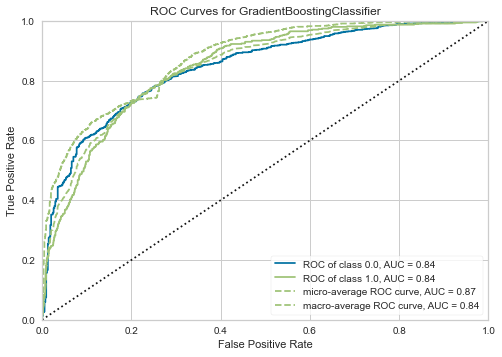

In [28]:
plot_model(tuned_gbc, plot = 'auc')

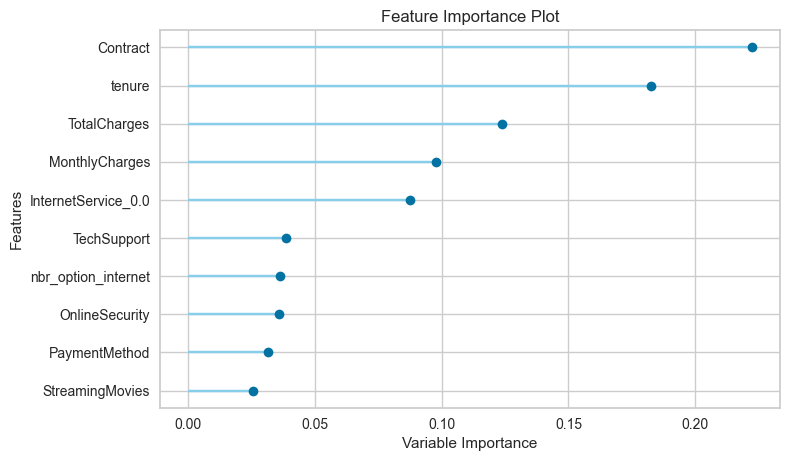

In [29]:
plot_model(tuned_gbc, plot='feature')